# Response for Tensor Noise

In this notebook, I will provide a code to generate response matrix based on tensor noise model. 

## I. Introduction of Background Knowledge
For simplicity, we will assume the measurement error of each qubit is independent, and the response matrix can be constructed directly from given data of the quantum device. Assume that for qubit $0$, the probability of getting $1$ when preparing $0$ is $p$, the probability of getting $0$ when preparing $1$ is $q$, the response matrix is given by
\begin{equation}
A_0 = \begin{pmatrix}
p(\text{measure }0|\text{true }0) & p(\text{measure }0|\text{true }1)\\
p(\text{measure }1|\text{true }0) & p(\text{measure }1|\text{true }1)
\end{pmatrix} = 
\begin{pmatrix}
1-p & q\\
p & 1-q
\end{pmatrix}
\end{equation}

The total response matrix $A$ is then given by
\begin{equation}
A = A_0\otimes A_1 \otimes \cdots \otimes A_n 
= \bigotimes_{i=0}^{n}A_i = \bigotimes_{i=0}^{n}A_i 
\begin{pmatrix}
1-p_i & q_i\\
p_i & 1-q_i
\end{pmatrix}
\end{equation}

As an example, we can use the readout error rate for each qubit in quantum processor ibmq\_lima to estimate the response matrix. The table with error rate is shown below. 
Note that *at least for current stage*, IBM will provide the readout error rate for each qubit as reference, and with the data it is easy to use tensor error method to get the response matrix. You can find an example provided by IBM below (edited in the afternoon on 01/06/2021). 

| Qubit | Prob meas0 prep1 ($q$)| Prob meas1 prep0 ($p$)|
| :----:   | :----:  |  :----: |
|  Q0  |   0.0396     | 0.014  |
|  Q1  |  0.029  | 0.0086  |
|  Q2  | 0.057      | 0.0118    |
|  Q3  | 0.0356   | 0.0126   |
|  Q4  | 0.0962   | 0.0128    |

In [1]:
import numpy as np

p0 = 0.014
p1 = 0.0086
p2 = 0.0118
p3 = 0.0126
p4 = 0.0128

q0 = 0.0396
q1 = 0.029
q2 = 0.057
q3 = 0.0356
q4 = 0.0962

In [2]:
qubit0 = np.array([[1-p0, q0], 
                   [p0, 1-q0]])

qubit1 = np.array([[1-p1, q1], 
                   [p1, 1-q1]])

qubit2 = np.array([[1-p2, q2], 
                   [p2, 1-q2]])

qubit3 = np.array([[1-p3, q3], 
                   [p3, 1-q3]])

qubit4 = np.array([[1-p4, q4], 
                   [p4, 1-q4]])

qubit = [qubit0, qubit1, qubit2, qubit3, qubit4]

In [3]:
nqubit = 5
for i in range(1, nqubit):
    if i == 1:
        matrixA = np.kron(qubit[i-1], qubit[i])
    else:
        matrixA = np.kron(matrixA, qubit[i])

<AxesSubplot:>

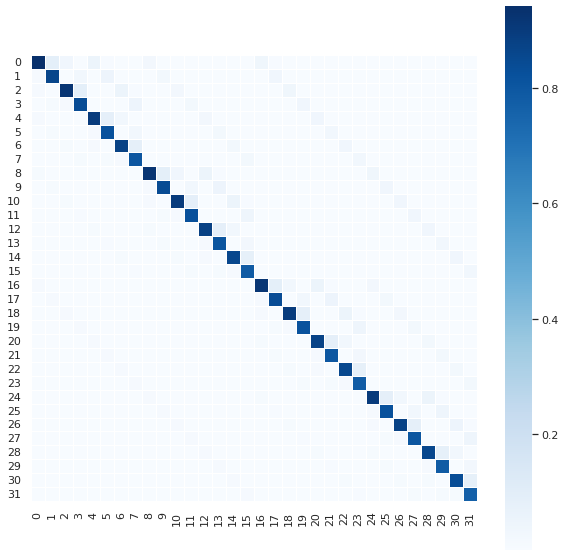

In [4]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(
    matrixA,
    cmap=sns.color_palette("Blues", as_cmap=True),
    linewidths=.5,
    #xticklabels = basis_state,
    #yticklabels = basis_state,
    square = True
)

In [5]:
np.savetxt('simple-tensor.txt', matrixA)